In [16]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set()
import warnings
warnings.filterwarnings('ignore')

cmap = sns.diverging_palette(220, 10, as_cmap=True)

In [17]:
def read_data(location):
    location = location[['id', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'price', 'minimum_nights',
      'availability_365', 'number_of_reviews', 'review_scores_rating', 'neighbourhood', 'neighbourhood_cleansed',
       'review_scores_accuracy', 'review_scores_value']]
    return location

def get_stats(location):
    x = ['accommodates', 'bathrooms', 'bedrooms', 'price', 'minimum_nights',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_value']
    location = location.loc[:, x]
    location_stats = location.describe()
    location_stats = pd.concat([location_stats.iloc[0:4], location_stats.iloc[7:]])
    return location_stats


def reorder(location):
    new = location.set_index('location', append = True).unstack(0)
    return new

In [18]:
brooklyn = pd.read_csv('data/listings.csv.gz')
brooklyn = brooklyn[brooklyn['price'].notna()]
brooklyn = brooklyn[brooklyn['neighbourhood_group_cleansed'] == 'Brooklyn']
brooklyn = brooklyn.reset_index().drop(columns=['index'])

In [19]:
brooklyn = read_data(brooklyn)
brooklyn['price'] = brooklyn['price'].str.replace('$', '').str.replace(',', '').astype(float)



In [20]:
def get_neighborhood_stats(brooklyn):
    neighborhoods = brooklyn['neighbourhood_cleansed'].unique()
    stats_list = []
    
    for neighborhood in neighborhoods:
        neighborhood_stats = get_stats(brooklyn[brooklyn['neighbourhood_cleansed'] == neighborhood])
        neighborhood_stats['location'] = neighborhood
        neighborhood_stats = reorder(neighborhood_stats)
        stats_list.append(neighborhood_stats)
    
    statistics = pd.concat(stats_list)
    return statistics

statistics = get_neighborhood_stats(brooklyn)


statistics.index
statistics

accommodates                                 \
                                 count   max      mean  min       std   
location                                                                
Williamsburg                     893.0  16.0  2.492721  1.0  1.619390   
Fort Greene                      169.0  14.0  2.449704  1.0  1.735180   
Bedford-Stuyvesant              1698.0  16.0  2.732627  1.0  2.036585   
Greenpoint                       294.0  16.0  3.095238  1.0  1.894246   
Carroll Gardens                   77.0  12.0  3.519481  1.0  2.062257   
Park Slope                       163.0  12.0  3.245399  1.0  1.795371   
South Slope                       89.0   9.0  2.955056  1.0  1.580493   
Clinton Hill                     195.0  12.0  2.917949  1.0  1.884127   
Prospect Heights                  86.0  16.0  3.174419  1.0  2.666533   
Boerum Hill                       55.0   8.0  3.254545  1.0  1.417068   
Brooklyn Heights                  40.0   7.0  2.875000  1.0  1.417609   
Crown Heights                    733.0  16.0  3.313779  1.0  2.883397   
Gowanus                           87.0  16.0  3.482759  1.0  2.307027   
Bushwick                         840.0  16.0  2.398810  1.0  2.207204   
Downtown Brooklyn                 38.0   6.0  2.447368  1.0  1.057722   
Windsor Terrace                   49.0  12.0  3.612245  1.0  2.343576   
Flatbush                         263.0  13.0  2.300380  1.0  1.539889   
Sheepshead Bay                    83.0   8.0  2.759036  1.0  1.597180   
Bensonhurst                       36.0   9.0  3.416667  1.0  2.182724   
Sunset Park                      163.0  16.0  2.582822  1.0  1.894814   
Kensington                        52.0  16.0  3.115385  1.0  2.874184   
Prospect-Lefferts Gardens        236.0  12.0  2.635593  1.0  1.898108   
East New York                    246.0  16.0  3.768293  1.0  3.111396   
Red Hook                          28.0  12.0  3.000000  1.0  2.108185   
Gravesend                         38.0   8.0  2.447368  1.0  1.329445   
DUMBO                             22.0  10.0  3.272727  1.0  2.119789   
Bay Ridge                         88.0  12.0  2.659091  1.0  2.159642   
Cobble Hill                       33.0   7.0  3.333333  1.0  1.670828   
Canarsie                         188.0  10.0  2.946809  1.0  1.644092   
East Flatbush                    383.0  16.0  2.527415  1.0  1.844379   
Sea Gate                          17.0  16.0  4.470588  1.0  3.448145   
Flatlands                         82.0  16.0  3.146341  1.0  2.620536   
Midwood                           45.0   5.0  1.933333  1.0  0.836660   
Vinegar Hill                      10.0   4.0  2.500000  1.0  1.178511   
Borough Park                      35.0   6.0  2.171429  1.0  1.271537   
Cypress Hills                    138.0  16.0  2.920290  1.0  2.386279   
Columbia St                        7.0   4.0  2.285714  1.0  0.951190   
Manhattan Beach                    5.0   4.0  2.800000  2.0  1.095445   
Brownsville                       75.0  16.0  2.760000  1.0  2.097875   
Fort Hamilton                     91.0   6.0  2.549451  1.0  1.118170   
Brighton Beach                    41.0   6.0  2.439024  1.0  1.245969   
Dyker Heights                     12.0   4.0  2.000000  1.0  0.852803   
Coney Island                      18.0  12.0  3.222222  1.0  2.390067   
Mill Basin                        10.0   8.0  3.400000  2.0  1.897367   
Bath Beach                        21.0   5.0  2.571429  1.0  1.325573   
Bergen Beach                      15.0  12.0  3.600000  1.0  2.971291   
Navy Yard                          4.0  16.0  6.250000  1.0  6.849574   
Gerritsen Beach                    2.0   6.0  4.000000  2.0  2.828427   

                          bathrooms                                 ...  \
                              count   max      mean  min       std  ...   
location                                                            ...   
Williamsburg                  893.0   5.5  1.220605  0.0  0.555790  ...   
Fo

In [21]:
x = {
    'Bath Beach': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Bath Beach']),
    'Bay Ridge': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Bay Ridge']),
    'Bedford-Stuyvesant': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Bedford-Stuyvesant']),
    'Bensonhurst': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Bensonhurst']),
    'Bergen Beach': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Bergen Beach']),
    'Boerum Hill': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Boerum Hill']),
    'Borough Park': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Borough Park']),
    'Brighton Beach': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Brighton Beach']),
    'Brooklyn Heights': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Brooklyn Heights']),
    'Brownsville': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Brownsville']),
    'Bushwick': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Bushwick']),
    'Canarsie': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Canarsie']),
    'Carroll Gardens': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Carroll Gardens']),
    'Clinton Hill': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Clinton Hill']),
    'Cobble Hill': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Cobble Hill']),
    'Columbia St': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Columbia St']),
    'Coney Island': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Coney Island']),
    'Crown Heights': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Crown Heights']),
    'Cypress Hills': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Cypress Hills']),
    'Downtown Brooklyn': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Downtown Brooklyn']),
    'DUMBO': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'DUMBO']),
    'Dyker Heights': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Dyker Heights']),
    'East Flatbush': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'East Flatbush']),
    'East New York': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'East New York']),
    'Flatbush': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Flatbush']),
    'Flatlands': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Flatlands']),
    'Fort Greene': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Fort Greene']),
    'Fort Hamilton': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Fort Hamilton']),
    'Gerritsen Beach': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Gerritsen Beach']),
    'Gowanus': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Gowanus']),
    'Gravesend': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Gravesend']),
    'Greenpoint': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Greenpoint']),
    'Kensington': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Kensington']),
    'Manhattan Beach': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Manhattan Beach']),
    'Midwood': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Midwood']),
    'Mill Basin': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Mill Basin']),
    'Navy Yard': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Navy Yard']),
    'Park Slope': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Park Slope']),
    'Prospect Heights': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Prospect Heights']),
    'Prospect-Lefferts Gardens': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Prospect-Lefferts Gardens']),
    'Red Hook': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Red Hook']),
    'Sea Gate': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Sea Gate']),
    'Sheepshead Bay': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Sheepshead Bay']),
    'South Slope': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'South Slope']),
    'Sunset Park': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Sunset Park']),
    'Vinegar Hill': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Vinegar Hill']),
    'Williamsburg': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Williamsburg']),
    'Windsor Terrace': len(brooklyn[brooklyn['neighbourhood_cleansed'] == 'Windsor Terrace'])
}

df = pd.DataFrame(x, index=[0]).stack()
df = pd.DataFrame(df).sort_values([0], ascending=[False]).reset_index(0)
df = df[0]
df = pd.DataFrame(df)
df.columns = ['Count of Listings']
df

,Count of Listings
Bedford-Stuyvesant,1698
Williamsburg,893
Bushwick,840
Crown Heights,733
East Flatbush,383
Greenpoint,294
Flatbush,263
East New York,246
Prospect-Lefferts Gardens,236
Clinton Hill,195


Text(0.5, 1.0, 'Count of Listings')

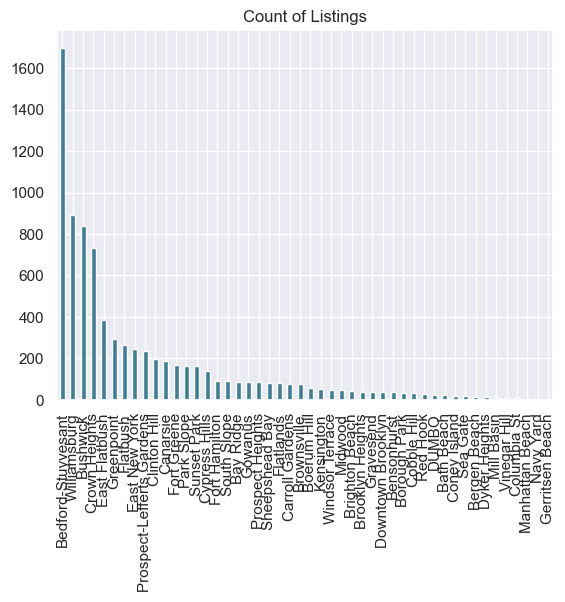

In [22]:
df['Count of Listings'].plot(kind = 'bar', cmap = cmap)
plt.title('Count of Listings')

In [24]:
# Creating DataFrame of population in each metro area in millions from US Census 
pop = pd.read_csv('data/population.csv')
pop.columns = ['City', 'Population']
pop = pop.set_index('City')

df1 = pd.concat([df, pop], axis = 1)
df1 = df1.astype('float')
df1['Normalized by Population'] = df1['Count of Listings'] / df1['Population']
df1.sort_values(['Normalized by Population'], ascending=[False]).reset_index(0)

,index,Count of Listings,Population,Normalized by Population
0,Navy Yard,4.0,0.00005,80000.000000
1,Fort Hamilton,91.0,0.00775,11741.935484
2,Columbia St,7.0,0.00306,2287.581699
3,South Slope,89.0,0.04459,1995.963220
4,Bedford-Stuyvesant,1698.0,1.73842,976.749002
5,Greenpoint,294.0,0.38980,754.232940
6,Gowanus,87.0,0.11867,733.125474
7,Bushwick,840.0,1.20741,695.704028
8,Clinton Hill,195.0,0.28647,680.699550
9,Carroll Gardens,77.0,0.12853,599.081926


In [25]:
z = [(365 - statistics['availability_365']['mean']), df1['Normalized by Population']]
df2 = pd.concat(z, axis=1)
df2

,mean,Normalized by Population
Williamsburg,158.240761,540.736928
Fort Greene,128.733728,513.085190
Bedford-Stuyvesant,123.474087,976.749002
Greenpoint,145.438776,754.232940
Carroll Gardens,164.480519,599.081926
Park Slope,157.582822,197.582942
South Slope,170.561798,1995.963220
Clinton Hill,114.697436,680.699550
Prospect Heights,133.360465,365.490863
Boerum Hill,129.818182,134.251123


Text(0.5, 1.0, 'Popularity and Normalized Listing Count')

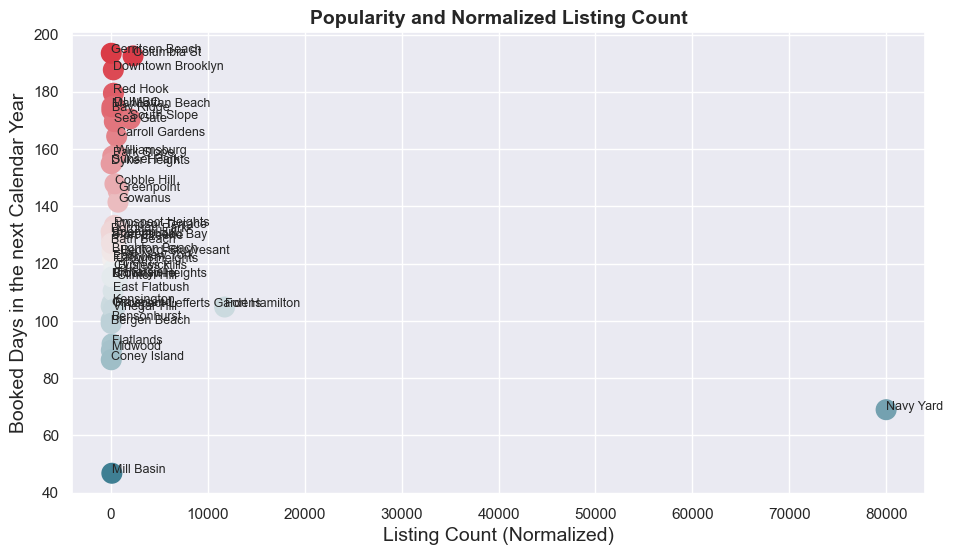

In [26]:
z = [(365 - statistics['availability_365']['mean']), df1['Normalized by Population']]
df2 = pd.concat(z, axis = 1)
x = df2['Normalized by Population']
y = df2['mean']

n = (df2.index.tolist())

fig, ax = plt.subplots(figsize=(11,6))
ax.scatter(x, y, c=y,cmap = cmap, s =200)
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 9)

plt.xlabel('Listing Count (Normalized)', fontsize=14)
plt.ylabel('Booked Days in the next Calendar Year', fontsize=14)
plt.title('Popularity and Normalized Listing Count', fontsize=14, fontweight='bold')

In [27]:
pd.DataFrame(statistics['price']['mean']).sort_values(['mean'], ascending=[False])

,mean
location,
Navy Yard,539.500000
Greenpoint,307.557823
Prospect Heights,306.069767
Carroll Gardens,299.480519
Boerum Hill,295.654545
Brooklyn Heights,286.750000
Vinegar Hill,285.200000
Cobble Hill,273.848485
Gowanus,261.551724


Text(0.5, 1.0, 'Price and Normalized Listing Count')

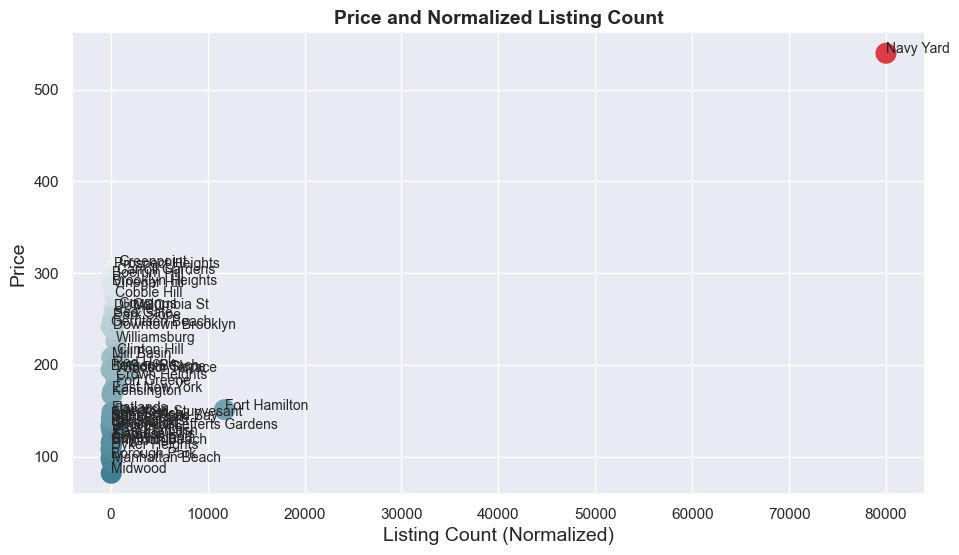

In [28]:
z = [statistics['price']['mean'], df1['Normalized by Population']]
df2 = pd.concat(z, axis = 1)

x = df2['Normalized by Population']
y = df2['mean']

n = (df2.index.tolist())

fig, ax = plt.subplots(figsize=(11,6))
ax.scatter(x, y, c=y,cmap = cmap, s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)
    
    
plt.xlabel('Listing Count (Normalized)', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price and Normalized Listing Count', fontsize=14, fontweight='bold')

In [29]:
df2.corr()

,mean,Normalized by Population
mean,1.000000,0.606893
Normalized by Population,0.606893,1.000000


In [31]:
x = (365 - statistics['availability_365']['mean'])
x = pd.DataFrame(x).sort_values(['mean'], ascending=[False])
x.columns = ['Availability']
x

,Availability
location,
Gerritsen Beach,193.500000
Columbia St,192.571429
Downtown Brooklyn,187.710526
Red Hook,179.535714
DUMBO,175.045455
Manhattan Beach,174.800000
Bay Ridge,173.522727
South Slope,170.561798
Sea Gate,169.647059


In [32]:
x = pd.DataFrame(statistics['number_of_reviews']['mean']).sort_values(['mean'], ascending=[False])
x.columns = ['Avg. # of Reviews']
x


,Avg. # of Reviews
location,
DUMBO,96.136364
Columbia St,86.142857
Park Slope,73.251534
Manhattan Beach,69.400000
Cobble Hill,68.727273
Carroll Gardens,63.116883
Gowanus,61.206897
Boerum Hill,59.890909
Prospect Heights,59.616279


Text(0.5, 1.0, 'Average Price and Popularity of Listings')

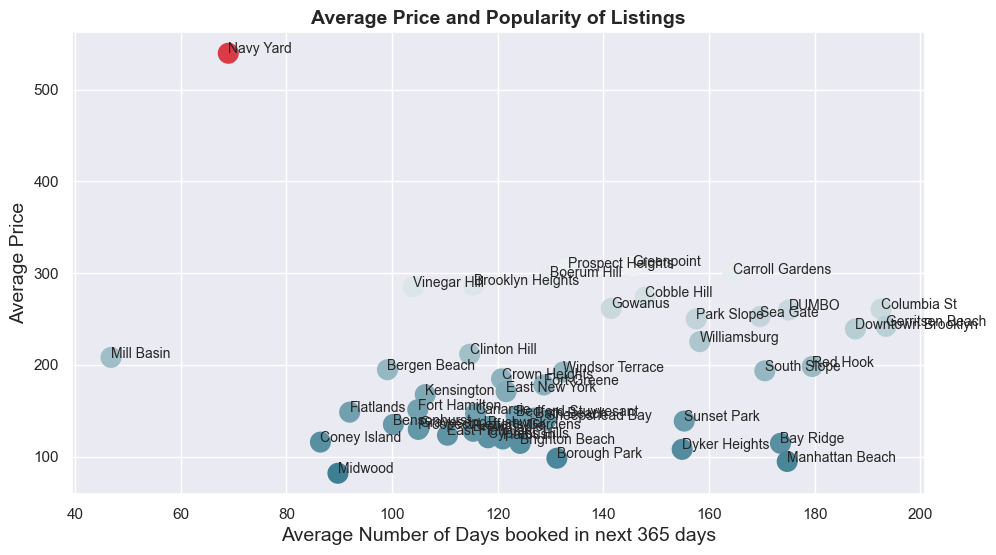

In [33]:
x = (365 - statistics['availability_365']['mean'])
y = statistics['price']['mean']

n = (x.reset_index()).location.tolist()

fig, ax = plt.subplots(figsize=(11,6))
ax.scatter(x, y, c=y,cmap = cmap , s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)
    
    
plt.xlabel('Average Number of Days booked in next 365 days', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Average Price and Popularity of Listings', fontsize=14, fontweight='bold')

Text(0.5, 1.0, 'Average Price and Popularity of Listings')

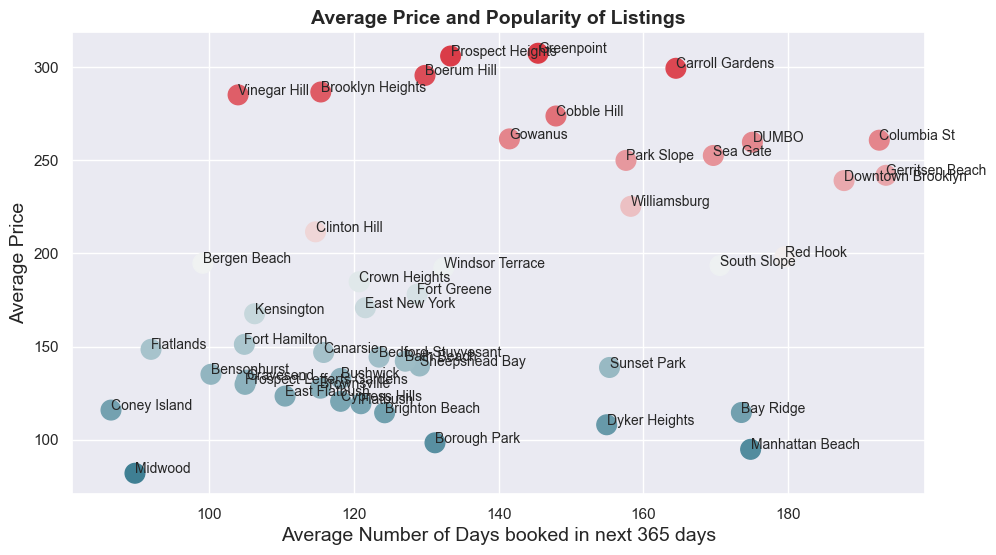

In [40]:
x = (365 - statistics['availability_365']['mean']).drop(['Mill Basin', 'Navy Yard'])
y = statistics['price']['mean'].drop(['Mill Basin', 'Navy Yard'])
n = (x.reset_index()).location.tolist()

fig, ax = plt.subplots(figsize=(11, 6))
ax.scatter(x, y, c=y,cmap = cmap , s =200)

for i, txt in enumerate(n):
    ax.annotate(txt, (x[i],y[i]), fontsize = 10)

plt.xlabel('Average Number of Days booked in next 365 days', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Average Price and Popularity of Listings', fontsize=14, fontweight='bold')